<a href="https://colab.research.google.com/github/sandhigupta/Sandhi/blob/main/fida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import time
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv(r'LoadMinPower.csv', sep=',', header=0)
df.head(5)

,Date (month/day/year),Time,1,2,3,4,5,6,7,8,9,10,11
0,7/1/2012,0:00:00,0.586700,45.805173,1.381984,0.190083,1.892434,1.210491,0.192630,0.013212,1.490395,0.994408,0.526979
1,7/1/2012,0:30:00,7.376893,42.177474,1.289851,0.209479,0.773636,0.993516,0.256840,0.027524,0.042401,0.913134,0.535087
2,7/1/2012,1:00:00,6.781565,40.516599,1.289851,0.190083,0.752808,1.119133,0.186456,0.024221,0.076322,0.841422,0.543194
3,7/1/2012,1:30:00,5.211279,59.398121,1.259141,0.203660,0.535594,0.730862,0.113602,0.012111,0.019080,0.951380,0.421583
4,7/1/2012,2:00:00,4.693602,2.622434,1.289851,0.145472,0.654615,1.016355,0.187691,0.025322,0.095402,0.784052,0.462120


In [3]:
col_means = [np.array(df.get([f'{i}'])).mean() for i in range(1, 12)]
print(f" Means for all columns in the data set: \n{col_means}")

 Means for all columns in the data set: 
[2.6001453967446917, 4.860338390023402, 3.0818954532995435, 0.44231668384223743, 1.4445030776017693, 2.1517111577197485, 0.6008603246534246, 0.13592625371461187, 0.3460468516870434, 1.251038135477283, 0.9596871191652397]


In [4]:
col_vars = [np.array(df.get([f'{i}'])).var() for i in range(1, 12)]
print(f" Variance for all columns in the data set: \n{col_vars}")

 Variance for all columns in the data set: 
[7.1065135017116745, 64.14666762177022, 14.020998533068777, 0.30758108590942007, 0.9221125416438508, 5.187758988775928, 0.43672129112649516, 0.0891253556427413, 0.24543952283353931, 1.8664821652639871, 0.8900130171340858]


In [5]:
initial_data = df.copy()

In [6]:
def inject(data, mean, std):
  features = [list(i) for i in data[0]]
  labels = list(data[1])
  for i in range(len(features)):
    if np.random.random() < 0.3333:
      values_to_inject = np.random.normal(mean, std, len(features[0]))
      features[i] = [a - b for a, b in zip(features[i], values_to_inject)]
      labels[i] += 1
      return (np.array(features), np.array(labels))

In [7]:
initial_data.drop(initial_data.columns[[0,1]], axis=1, inplace=True)
injection = inject((initial_data.to_numpy(), [0 for i in range(len(initial_data))]), 2, 0.1)
features, labels = injection[0], injection[1]

In [8]:
np.savetxt('features.csv', features, delimiter=',')
np.savetxt('labels.csv', labels, delimiter=',')
features = np.array(pd.read_csv('features.csv'))
labels = np.array(pd.read_csv('labels.csv')).astype(int)

In [9]:
y = np.array([i[0] for i in features][:100])
y2 = np.array([i[4] for i in features][:100])
y3 = np.array([i[10] for i in features][:100])
print(f" Sensor 1 Mean: {y.mean()}, Variance: {y.var()}")
print(f" Sensor 5 Mean: {y2.mean()}, Variance: {y2.var()}")
print(f" Sensor 11 Mean: {y3.mean()}, Variance: {y3.var()}")

 Sensor 1 Mean: 2.6142477675097298, Variance: 5.084114134284945
 Sensor 5 Mean: 1.8264094736910872, Variance: 1.7586212457395525
 Sensor 11 Mean: 0.9024626075341337, Variance: 0.4968783959064224


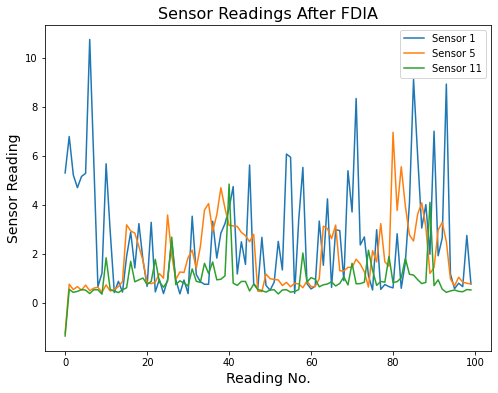

In [10]:
x = np.arange(0, len(y))
plt.figure(figsize=(8,6))
plt.xlabel('Reading No.',fontsize=14)
plt.ylabel('Sensor Reading',fontsize=14)
plt.title('Sensor Readings After FDIA',fontsize=16)
plt.plot(x,y,label='Sensor 1')
plt.plot(y2, label = 'Sensor 5')
plt.plot(y3, label = 'Sensor 11')
plt.legend(loc='upper right')
plt.savefig('LoadMinSensorsafterFDIA')
plt.show()

In [11]:
def generateDataSet(num_features, readings):
  data_set = []
  for i in range(num_features):
    thresh = np.random.random()
    if thresh < 0.26:
      data_set.append(list(np.random.normal(20, 2, readings)))
    elif 0.51 > thresh >= 0.26:
      data_set.append(list(np.random.exponential(10, readings)))
    elif 0.76 > thresh >= 0.51:
      data_set.append(list(np.random.random(readings)))
    else:
      data_set.append(list(np.random.beta(5, 4, readings)))
  return (np.array(data_set).transpose(), np.array([0 for i in range(readings)]))

In [12]:
fdia_data = inject(generateDataSet(11, 10000), 0.5, 0.05)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(fdia_data[0], fdia_data[1], test_size=0.3, random_state=5, shuffle=True)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=1, shuffle=True)

In [15]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train.ravel())

KNeighborsClassifier()

In [16]:
knn_predictions = knn_model.predict(X_test)
print(f"Accuracy of KNN: {round(accuracy_score(y_test, knn_predictions)*100)}%")

Accuracy of KNN: 100%


In [17]:
svm = SVC()
svm.fit(X_train, y_train.ravel())

svm_predictions = svm.predict(X_test)

print(f"Accuracy of SVM: {round(accuracy_score(y_test, svm_predictions)*100)}%")

Accuracy of SVM: 100%


In [18]:
df = pd.read_csv(r'LoadMaxPower.csv')

df.drop(df.columns[[0,1]], axis=1, inplace=True)
injection = inject((df.to_numpy(), [0 for i in range(len(df))]), 5, 0.5)
features, labels = injection[0], injection[1]

In [19]:
np.savetxt('max_features.csv', features, delimiter=',')
np.savetxt('max_labels.csv', labels, delimiter=',')
max_features = np.array(pd.read_csv('max_features.csv'))
max_labels = np.array(pd.read_csv('max_labels.csv')).astype(int)

In [20]:
knn_pred = knn_model.predict(max_features)
print(f" KNN: {accuracy_score(max_labels, knn_pred)}")

tn, fp, fn, tp = confusion_matrix(max_labels, knn_pred).ravel()
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

 KNN: 0.9999429191163879
TN: 17518, FP: 0, FN: 1, TP: 0


In [21]:
svm_pred = svm.predict(max_features)
print(f" SVM: {accuracy_score(max_labels, svm_pred)}")
#Confusion Matrix
tn, fp, fn, tp = confusion_matrix(max_labels, svm_pred).ravel()
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

 SVM: 0.9999429191163879
TN: 17518, FP: 0, FN: 1, TP: 0


In [22]:
max_features_re = max_features.copy().reshape(len(max_features), 11, 1)

In [23]:
confusion_matrix(max_labels, knn_pred)

array([[17518,     0],
       [    1,     0]])

In [24]:
confusion_matrix(max_labels, svm_pred)

array([[17518,     0],
       [    1,     0]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


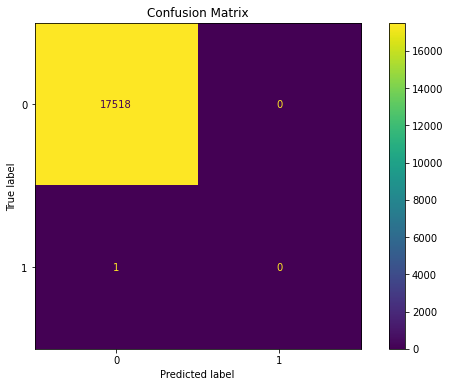

In [25]:
matrix = plot_confusion_matrix(knn_model, max_features, max_labels)
matrix.ax_.set_title('Confusion Matrix', color='black')
plt.xlabel('Predicted label', color='black')
plt.ylabel('True label',color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


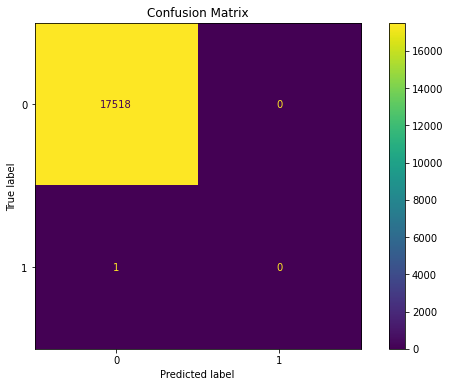

In [27]:
matrix = plot_confusion_matrix(svm, max_features, max_labels)
matrix.ax_.set_title('Confusion Matrix', color='black')
plt.xlabel('Predicted label', color='black')
plt.ylabel('True label',color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()